# Titanic Data Set

The data is related to the ship and the passengers travelling. The classification goal is to predict whether the passenger will survive or not.

Features:
1. Age
2. Cabin
3. Embarked
4. Fare
5. Name
6. Parch
7. PassengerID
8. PClass
9. Sex
10. SibSp
11. Ticket
12. Survived <---- Output

In [501]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [502]:
# Load data as Pandas dataframe
train = pd.read_csv('https://github.com/soni-shr/Titanic_Neural_Network/raw/main/train.csv')
test = pd.read_csv('https://github.com/soni-shr/Titanic_Neural_Network/raw/main/test.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [503]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [504]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


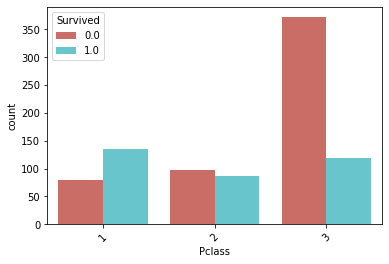

In [505]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

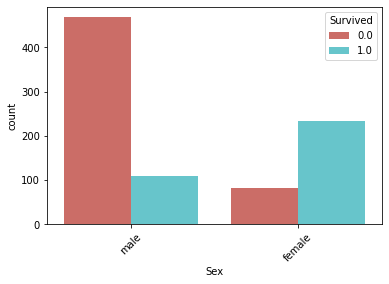

In [506]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

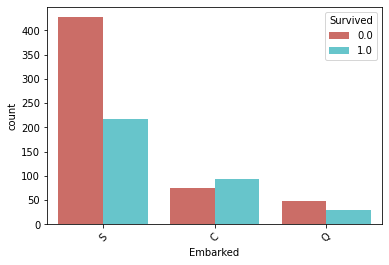

In [507]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

# Data Cleaning

In [508]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [509]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [510]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [511]:
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,1,1,0.0,0,0,1
1,38.0,71.2833,0,1,0,1,1.0,1,0,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,1
3,35.0,53.1000,0,1,0,1,1.0,0,0,1
4,35.0,8.0500,0,3,1,0,0.0,0,0,1


In [512]:
#droppping all NAN
df = df.dropna()

In [513]:
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,1,1,0.0,0,0,1
1,38.0,71.2833,0,1,0,1,1.0,1,0,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,1
3,35.0,53.1000,0,1,0,1,1.0,0,0,1
4,35.0,8.0500,0,3,1,0,0.0,0,0,1


In [514]:
#converting to int
df['Survived'] = df['Survived'].astype(int)

In [515]:
df.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,1,1,0,0,0,1
1,38.0,71.2833,0,1,0,1,1,1,0,0
2,26.0,7.9250,0,3,0,0,1,0,0,1
3,35.0,53.1000,0,1,0,1,1,0,0,1
4,35.0,8.0500,0,3,1,0,0,0,0,1


In [516]:
#Scaling continous variables
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [517]:
#splitting input and output data
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [518]:
def diagnostic_plots(df1, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df1, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df1[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.show()

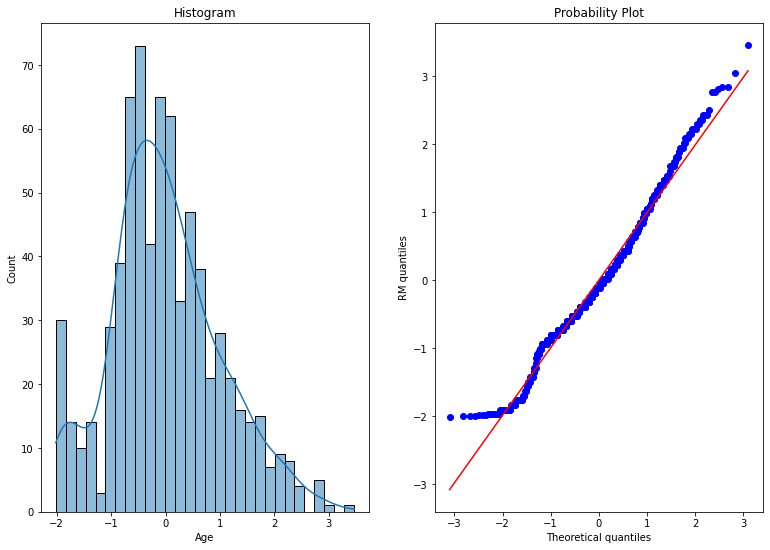

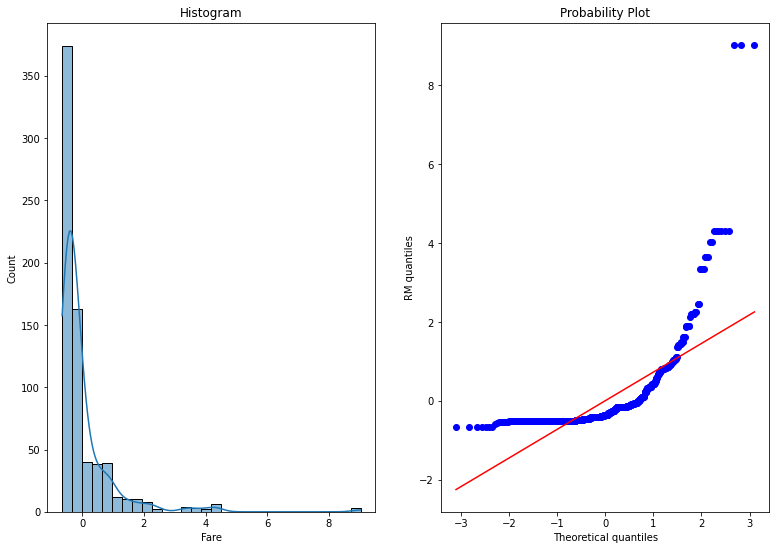

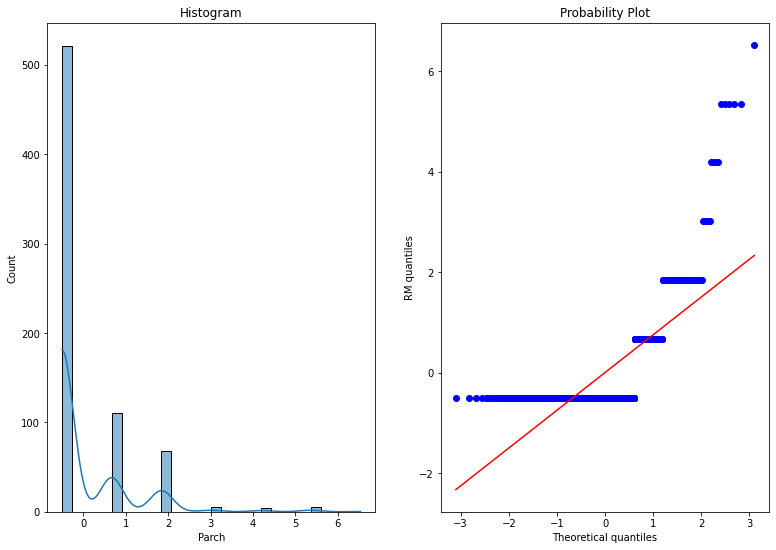

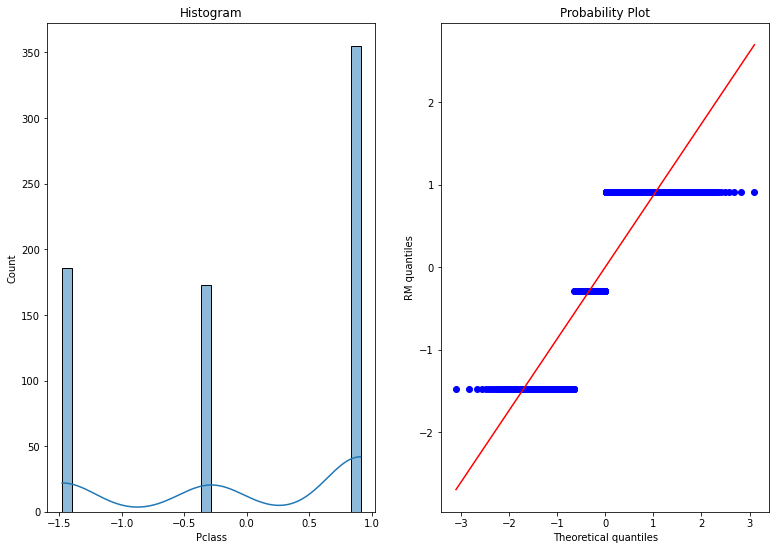

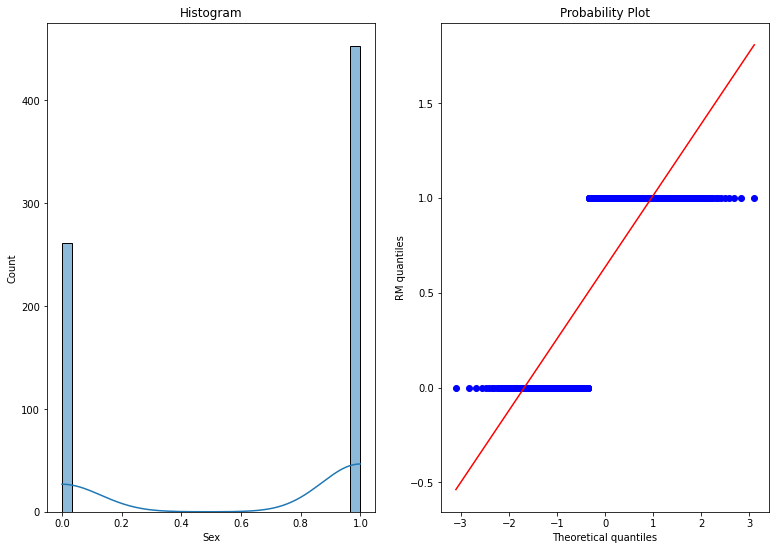

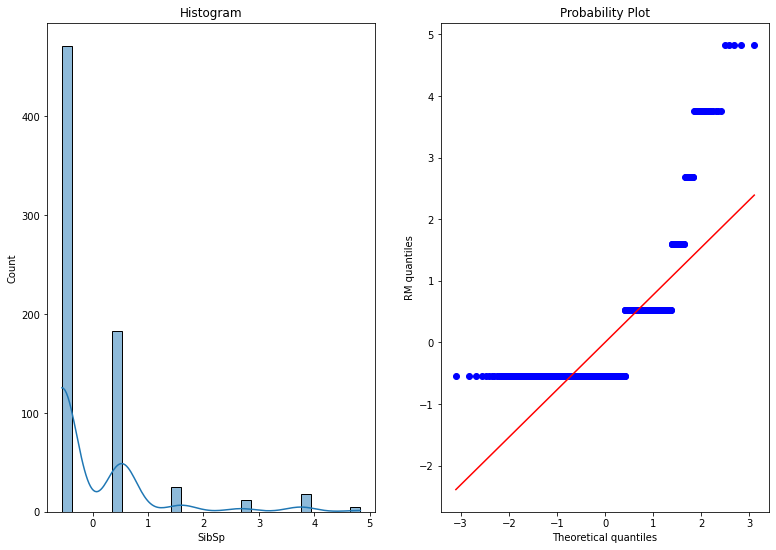

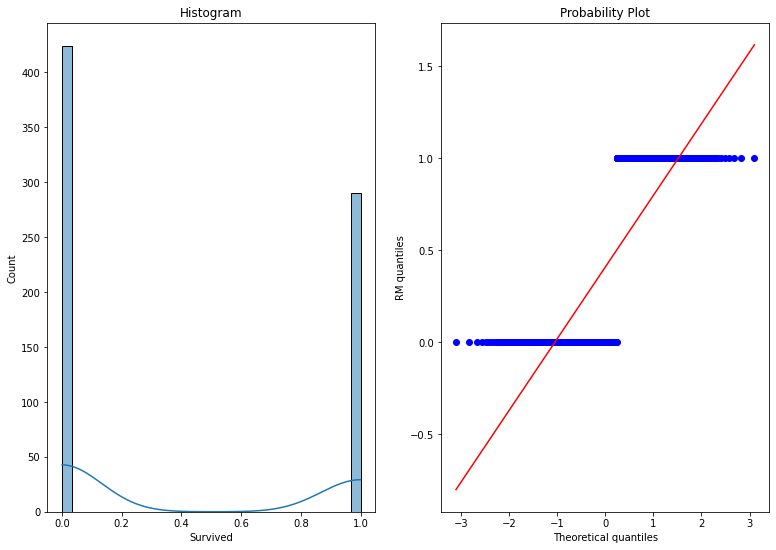

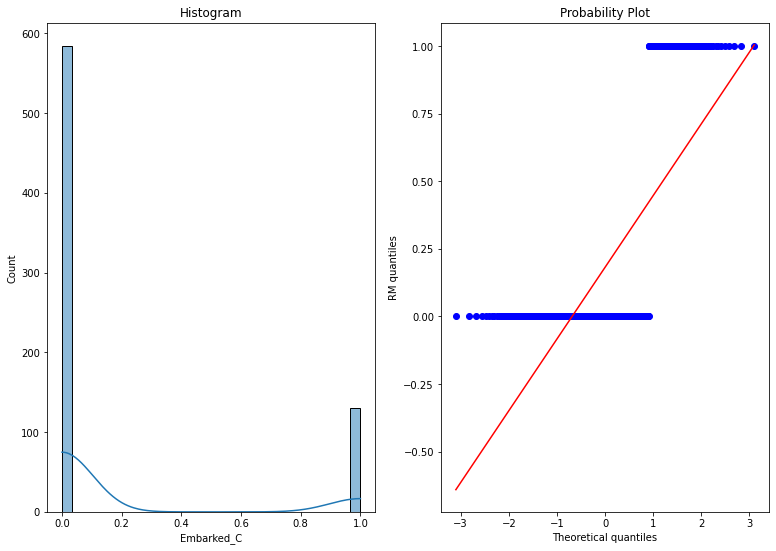

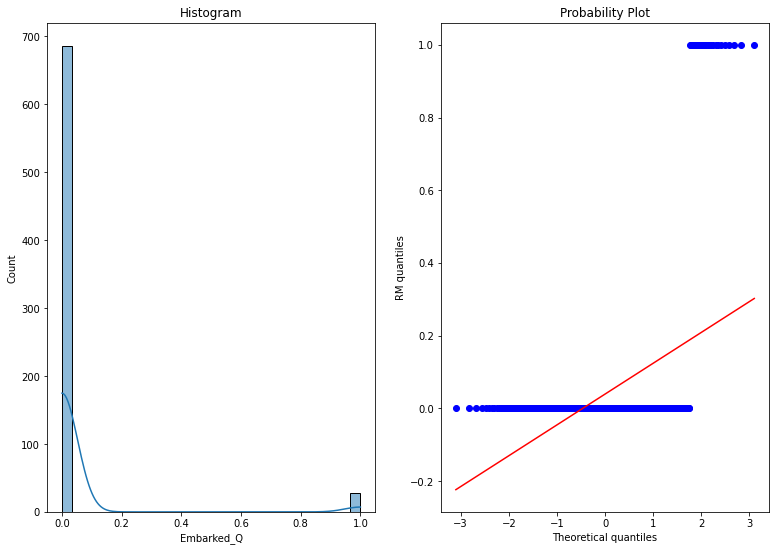

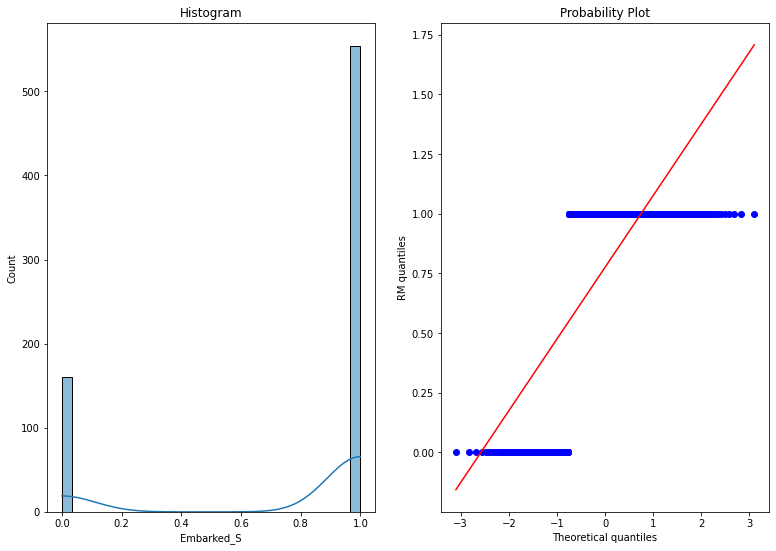

In [519]:
cols = df.columns
for i in cols:
    diagnostic_plots(df,i)

In [520]:
#splitting the data for test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Sigmoid: Activation Function

In machine learning, the term Sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function.
All sigmoid functions have the property that they map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function is to convert a real value into one that can be interpreted as a probability.

In [521]:
# Sigmoid Function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [522]:
# Cost Function
def J(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [523]:
# Gradient Descent Function
def gradientdescent(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [524]:
# Predict Function 
def predict(X_test, theta):
    z = np.dot(X_test, theta)
    return sigmoid(z)

In [525]:
# Main Logistic Function
def logistic(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predict(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predict(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [526]:
result_sig = logistic(X_train, y_train, X_test)

In [527]:
y_preds = result_sig['Y_prediction_test']

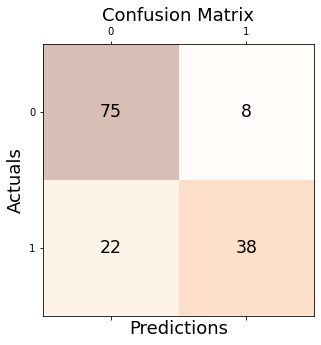

Precision: 0.795
Recall: 0.790
Accuracy: 0.790
F1 Score: 0.785


In [528]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_preds, average='weighted', labels=np.unique(y_preds)))
print('Recall: %.3f' % recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_preds))
print('F1 Score: %.3f' % f1_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))

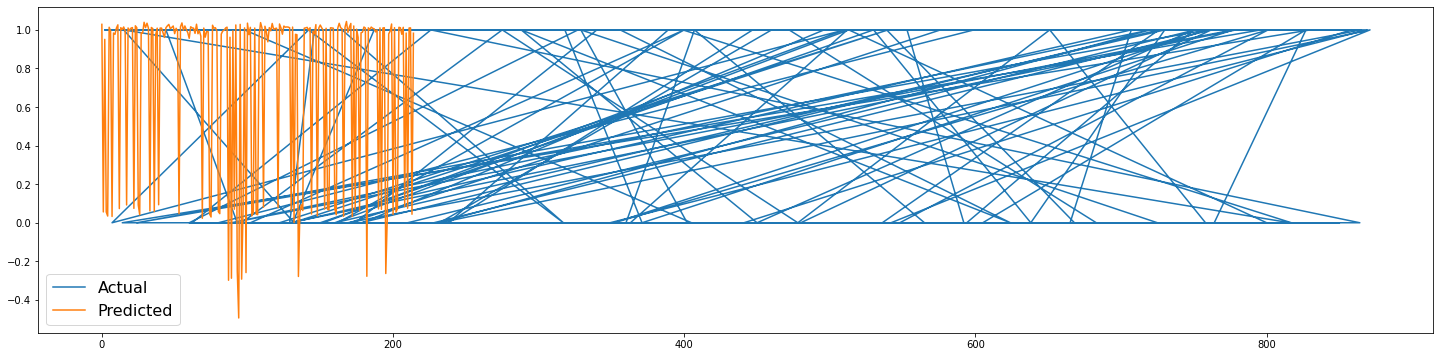

Mean Squared Error : 0.2097902097902098


In [529]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_preds))

# Relu: Activation Function

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
The ReLu function has been used to calculate the activation values in traditional neural network or deep neural network paradigms.

In [530]:
def relu(x):
    return max(0.0, np.all(x))

In [531]:
# Gradient Descent Function
def gradientdescentrelu(X, y, lmd, alpha, num_iter, print_cost):

    # select initial values zero
    theta = np.zeros(X.shape[1])
    
    costs = []  
    
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = relu(z)
        
        # adding regularization 
        reg = lmd / y.size * theta
        # first theta is intercept
        # it is not regularized
        reg[0] = 0
        cost = J(h, y)
        
        gradient = np.dot(X.T, (h - y)) / y.size + reg
        theta = theta - alpha * gradient
    
        if print_cost and i % 100 == 0: 
            print('Number of Iterations: ', i, 'Cost : ', cost, 'Theta: ', theta)
        if i % 100 == 0:
            costs.append(cost)
      
    return theta, costs

In [532]:
# Predict Function 
def predictrelu(X_test, theta):
    z = np.dot(X_test, theta)
    return relu(z)

In [533]:
# Main Logistic Function
def logisticrelu(X_train, y_train, X_test, lmd=0, alpha=0.1, num_iter=30000, print_cost = False):
    # Adding intercept
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
    intercept = np.ones((X_test.shape[0], 1))
    X_test = np.concatenate((intercept, X_test), axis=1)

    # one vs rest
    u=set(y_train)
    t=[]
    allCosts=[]   
    for c in u:
        # set the labels to 0 and 1
        ynew = np.array(y_train == c, dtype = int)
        theta_onevsrest, costs_onevsrest = gradientdescent(X_train, ynew, lmd, alpha, num_iter, print_cost)
        t.append(theta_onevsrest)
        
        # Save costs
        allCosts.append(costs_onevsrest)
        
    # Calculate probabilties
    pred_test = np.zeros((len(u),len(X_test)))
    for i in range(len(u)):
        pred_test[i,:] = predictrelu(X_test,t[i])
    
    # Select max probability
    prediction_test = np.argmax(pred_test, axis=0)
    
    # Calculate probabilties
    pred_train = np.zeros((len(u),len(X_train)))
    for i in range(len(u)):
        pred_train[i,:] = predictrelu(X_train,t[i])
    
    # Select max probability
    prediction_train = np.argmax(pred_train, axis=0)
    
    d = {"costs": allCosts,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "learning_rate" : alpha,
         "num_iterations": num_iter,
         "lambda": lmd}
        
    return d

In [534]:
result_re = logisticrelu(X_train, y_train, X_test)

In [535]:
y_predr = result_re['Y_prediction_test']

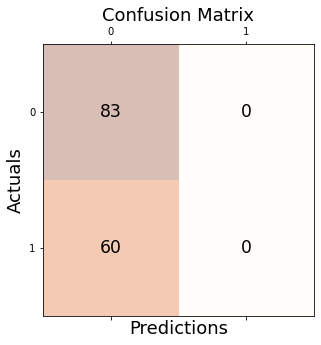

Precision: 0.580
Recall: 1.000
Accuracy: 0.580
F1 Score: 0.735


In [536]:
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predr)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred=y_predr, average='weighted', labels=np.unique(y_predr)))
print('Recall: %.3f' % recall_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predr))
print('F1 Score: %.3f' % f1_score(y_test, y_predr, average='weighted', labels=np.unique(y_predr)))

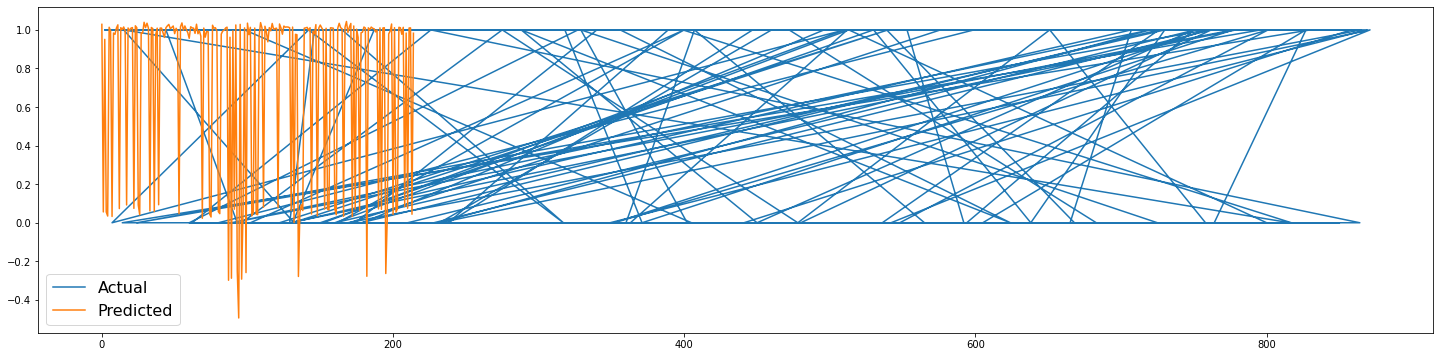

Mean Squared Error : 0.4195804195804196


In [537]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_predr))

# Stochastic Gradient Descent

Stochastic gradient descent is a method to find the optimal parameter configuration for a machine learning algorithm. It iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network. 

In [538]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=100, k=40):
    
    w = np.random.randn(1,9)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:9].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
            
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        loss = mean_squared_error(y_pred, y_tr)
        
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [539]:
# split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [540]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:9].values
        y = (np.dot(w,X_test[i])+b).item()
        
        y_pred.append(y)
    return np.array(y_pred)

w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 2.181
Epoch: 2, Loss: 0.819
Epoch: 3, Loss: 0.345
Epoch: 4, Loss: 0.146
Epoch: 5, Loss: 0.109
Epoch: 6, Loss: 0.127
Epoch: 7, Loss: 0.074
Epoch: 8, Loss: 0.071
Epoch: 9, Loss: 0.039
Epoch: 10, Loss: 0.036
Epoch: 11, Loss: 0.036
Epoch: 12, Loss: 0.030
Epoch: 13, Loss: 0.022
Epoch: 14, Loss: 0.023
Epoch: 15, Loss: 0.017
Epoch: 16, Loss: 0.013
Epoch: 17, Loss: 0.025
Epoch: 18, Loss: 0.017
Epoch: 19, Loss: 0.009
Epoch: 20, Loss: 0.010
Epoch: 21, Loss: 0.014
Epoch: 22, Loss: 0.016
Epoch: 23, Loss: 0.010
Epoch: 24, Loss: 0.013
Epoch: 25, Loss: 0.009
Epoch: 26, Loss: 0.008
Epoch: 27, Loss: 0.011
Epoch: 28, Loss: 0.009
Epoch: 29, Loss: 0.007
Epoch: 30, Loss: 0.005
Epoch: 31, Loss: 0.004
Epoch: 32, Loss: 0.006
Epoch: 33, Loss: 0.006
Epoch: 34, Loss: 0.005
Epoch: 35, Loss: 0.007
Epoch: 36, Loss: 0.004
Epoch: 37, Loss: 0.005
Epoch: 38, Loss: 0.005
Epoch: 39, Loss: 0.004
Epoch: 40, Loss: 0.005
Epoch: 41, Loss: 0.003
Epoch: 42, Loss: 0.004
Epoch: 43, Loss: 0.004
Epoch: 44, Loss: 0.0

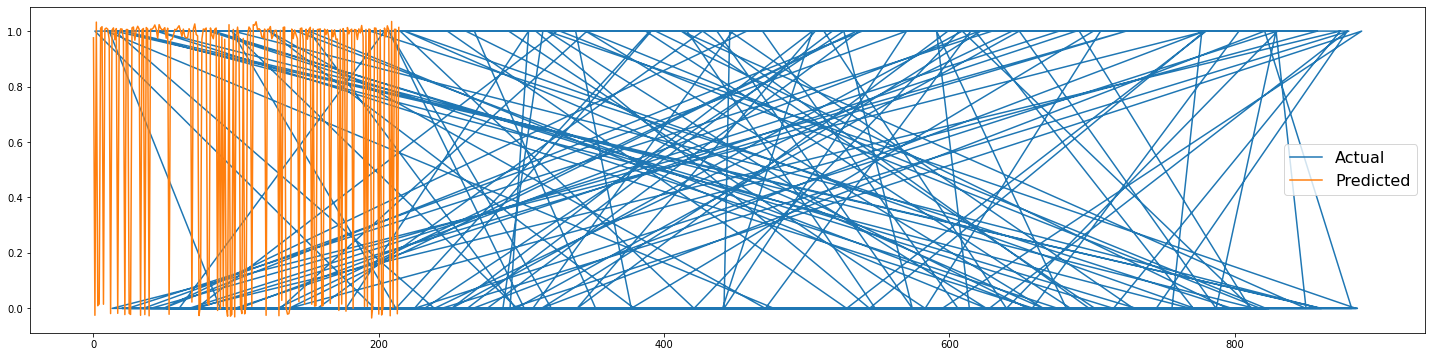

Mean Squared Error : 0.6086778033416276


In [541]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

# Ridge (L2)

The Ridge Classifier, based on Ridge regression method, converts the label data into [-1, 1] and solves the problem with regression method. The highest value in prediction is accepted as a target class and for multiclass data muilti-output regression is applied.

In [542]:
# Ridge Regression
  
class RidgeRegularization() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

R squared error :  0.40653690107699925
Mean Absolute Error :  0.30027198905389907
Predicted values
------------------
 423    0.50
177    0.86
305    0.67
dtype: float64
Real values
------------------
 423    0
177    0
305    1
Name: Survived, dtype: int64
Trained W         -0.09
Trained b         0.51


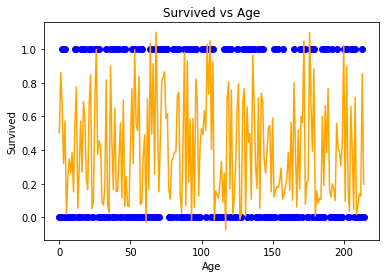

In [543]:
# Model training    
model = RidgeRegularization( iterations = 1000,                             
                        learning_rate = 0.01, l2_penality = 1 )
model.fit( X_train, y_train )
# Prediction on test set
Y_pred = model.predict( X_test )    

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) )     
print( "Real values\n------------------\n", y_test[:3] )    
print( "Trained W        ", round( model.W[0], 2 ) )    
print( "Trained b        ", round( model.b, 2 ) )


# Visualization on test set    
x_test=np.arange(0,len(X_test),1)
plt.scatter( x_test, y_test, color = 'blue' )    
plt.plot( x_test, Y_pred, color = 'orange' )    
plt.title( 'Survived vs Age' )    
plt.xlabel( 'Age' )    
plt.ylabel( 'Survived' )    
plt.show()

# Lasso (L1)

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [544]:
# Lasso Regression
  
class LassoRegularization() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :  
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) : 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
        
        # weight initialization  
        self.W = np.zeros( self.n ) 
        self.b = 0
        self.X = X 
        self.Y = Y
          
        # gradient descent learning
        for i in range( self.iterations ) :
            self.update_weights()
        return self
      
    # Helper function to update weights in gradient descent  
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
   
        # calculate gradients    
        dW = np.zeros( self.n )
        for j in range( self.n ) :
            if self.W[j] > 0 : 
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )           
                         + self.l1_penality ) / self.m
            else :  
                dW[j] = ( - ( 2 * ( self.X.iloc[:, j] ).dot( self.Y - Y_pred ) )         
                         - self.l1_penality ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

R squared error :  0.020802403149342896
Mean Absolute Error :  0.478373346236795
Predicted values
------------------
 423    0.39
177    0.42
305    0.43
dtype: float64
Real values
------------------
 423    0
177    0
305    1
Name: Survived, dtype: int64
Trained W         -0.0
Trained b         0.4


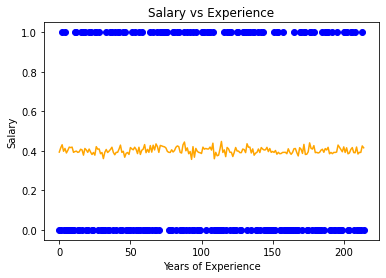

In [545]:
# Model training
      
model = LassoRegularization( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
model.fit( X_train, y_train )

# Prediction on test set
Y_pred = model.predict( X_test )

# R squared error
score_1 = metrics.r2_score(y_test, Y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print( "Predicted values\n------------------\n", np.round( Y_pred[:3], 2 ) ) 
print( "Real values\n------------------\n", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 
plt.scatter( x_test, y_test, color = 'blue' )
plt.plot( x_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()

# Conclusion:

For the titanic dataset, Sigmoid activation function gives the better accuracy then the Relu action function. Also, mean sqaure error is less in case of Sigmoid than Relu.
While upon regularization, Ridge(L2) gives less mean square error than Lasso(L1)

# Reference:
    
https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

https://researchdatapod.com/python-valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtype-float64/#:~:text=If%20you%20try%20to%20pass,for%20NaN%20values%20using%20numpy

https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/

https://discuss.dizzycoding.com/valueerror-x-and-y-must-be-the-same-size/

https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/